In [1]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [2]:
from IPython.display import Image

In [2]:
h2o.init(nthreads=-1, max_mem_size="10g", strict_version_check=True)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /Users/bobo/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/43/ry2dqs4x1t35mcdp09nxhmvr0000gn/T/tmp4r75ec5z
  JVM stdout: /var/folders/43/ry2dqs4x1t35mcdp09nxhmvr0000gn/T/tmp4r75ec5z/h2o_bobo_started_from_python.out
  JVM stderr: /var/folders/43/ry2dqs4x1t35mcdp09nxhmvr0000gn/T/tmp4r75ec5z/h2o_bobo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_bobo_oiyc0m
H2O cluster total nodes:,1
H2O cluster free memory:,8.89 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
test = h2o.import_file(path = "violent_night_test.csv")
train = h2o.import_file(path = "violent_night_train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train.head()

Round_lon,Round_lat,District,Year,Month,Last_month,Previous_occured,Adjacent_previous_occured,Last_occured,Crime_density,Total_density,Population..area.,Education.rate....,Housing..area.,Median.income,Foreign.born....,Poverty....,X15.19....,X20.24....,X25.29....,X30.34....,Median.age,White....,Black.or.African.American....,Asian....,Hispanic.or.Latino....,Householder..area.,Living.alone.householder....,Renter.occupied....,Response,BRONX,BROOKLYN,MANHATTAN,QUEENS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV
136,63,BROOKLYN,2009,MAR,0,0,6.04209,7.29915,0,5.14507,5.6185,4.6281,3.13656,1.19875,5.85753,5,6.79245,3.60825,2.26148,3.42541,1.21043,6.8595,0.0965665,3.76956,1.21088,6.0495,2.00686,6.83438,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
154,101,BROOKLYN,2012,SEP,0,0,4.76171,7.93407,8.0176,6.80273,5.85522,4.04959,3.55581,0.468405,2.83374,7.65625,7.45283,5.05155,3.5689,4.30939,0.242086,4.4938,3.21888,0.782361,5.67347,6.19125,2.50429,9.31866,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
184,93,BROOKLYN,2013,MAY,0,0,6.81217,4.54548,8.01958,6.28558,4.67372,4.79339,2.75008,0.6699,3.93356,6.22768,8.39623,4.38144,2.33216,3.31492,0.707635,1.22934,7.42489,0.142248,4.53061,5.70909,2.19554,7.73585,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
246,124,QUEENS,2007,SEP,0,0,0,4.54548,5.32362,4.06053,2.36552,7.85124,1.29378,2.28931,5.83492,1.31696,5.4717,2.47423,1.55477,2.87293,3.07263,4.6281,0.236052,6.60028,0.965986,4.96421,2.74443,2.61006,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
122,79,BROOKLYN,2009,DEC,0,0,0,7.75721,7.12947,5.40112,3.95809,2.52066,2.02734,1.22921,5.49617,5.69196,5.75472,4.89691,4.0636,5.63536,0.763501,4.27686,0.772532,2.21906,7.68707,5.32353,1.85249,7.93501,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
244,101,QUEENS,2014,MAR,0,0,5.49788,7.75721,6.5239,5.38364,3.33762,7.60331,1.63552,2.36367,4.77411,1.62946,7.26415,3.81443,1.87279,3.03867,2.01117,0,9.86052,0.056899,0.62585,5.11558,1.38937,3.08176,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
255,57,QUEENS,2007,JUN,0,2.38259,0.977225,2.89946,6.32924,4.77821,3.49556,4.23554,1.87018,0.920175,3.94828,4.75446,7.54717,3.65979,2.15548,3.31492,0.912477,3.05785,5.36481,0.199147,3.2517,5.23344,3.01887,7.80922,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
201,93,QUEENS,2010,FEB,2.43548,6.06704,6.0362,0,7.54638,6.39137,4.69752,4.71074,2.41207,1.75905,7.19381,3.25893,7.92453,4.3299,2.33216,3.75691,1.08007,3.1405,1.20172,3.18634,5.80952,5.58512,0.754717,6.14256,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
195,186,BRONX,2008,MAY,0,4.84236,6.67645,1.89082,8.29609,7.07099,5.80931,4.29752,3.51116,0.62843,5.20393,6.20536,7.07547,3.81443,2.65018,3.92265,1.04283,2.90289,4.44206,0.938834,6.36735,6.23664,3.27616,8.97275,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46,25,STATEN ISLAND,2013,DEC,0,0,2.37512,5.72391,6.25947,5.03084,1.60227,8.59504,0.678654,3.14023,1.48716,1.00446,6.13208,3.04124,1.73145,2.98343,2.42086,9.3595,0.128755,0.753912,0.92517,4.59362,1.56089,1.92872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
predictor = []
for i in range(5,45):
    if (i == 29):
        continue
    predictor.append(train.columns[i])

In [7]:
predictor

['Last_month',
 'Previous_occured',
 'Adjacent_previous_occured',
 'Last_occured',
 'Crime_density',
 'Total_density',
 'Population..area.',
 'Education.rate....',
 'Housing..area.',
 'Median.income',
 'Foreign.born....',
 'Poverty....',
 'X15.19....',
 'X20.24....',
 'X25.29....',
 'X30.34....',
 'Median.age',
 'White....',
 'Black.or.African.American....',
 'Asian....',
 'Hispanic.or.Latino....',
 'Householder..area.',
 'Living.alone.householder....',
 'Renter.occupied....',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV']

In [8]:
response = "Response"

In [9]:
print(train.dim)
print(test.dim)

[484944, 45]
[396360, 45]


In [10]:
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [11]:
nfolds = 4

## Logistic regression

In [12]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [13]:
glm_model = H2OGeneralizedLinearEstimator(family='binomial',
                                         model_id='violent_night_glm',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True,
                                         nfolds = nfolds,
                                         fold_assignment = "Modulo",
                                         keep_cross_validation_predictions = True,
                                         seed = 1234)

# train 
glm_model.train(x=predictor, 
                y=response, 
                training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  violent_night_glm


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.16275135275668356
RMSE: 0.40342453167436854
LogLoss: 0.48930945715000945
Null degrees of freedom: 484943
Residual degrees of freedom: 484915
Null deviance: 672275.1326586829
Residual deviance: 474575.37077630835
AIC: 474633.37077630835
AUC: 0.8410599117306465
Gini: 0.6821198234612931
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37815682271608614: 


,0,1,Error,Rate
0,153262.0,89210.0,0.3679,(89210.0/242472.0)
1,34761.0,207711.0,0.1434,(34761.0/242472.0)
Total,188023.0,296921.0,0.2556,(123971.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3781568,0.7701657,251.0
max f2,0.1796082,0.8606866,339.0
max f0point5,0.6313641,0.7720343,150.0
max accuracy,0.5269312,0.7577246,191.0
max precision,0.9822708,1.0,0.0
max recall,0.0179871,1.0,398.0
max specificity,0.9822708,1.0,0.0
max absolute_mcc,0.5269312,0.5159080,191.0
max min_per_class_accuracy,0.5012026,0.7562440,201.0
max mean_per_class_accuracy,0.5269312,0.7577246,191.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100012,0.9556031,1.9785567,1.9785567,0.9892784,0.9892784,0.0197879,0.0197879,97.8556701,97.8556701
,2,0.0200002,0.9454423,1.9459682,1.9622642,0.9729841,0.9811321,0.0194579,0.0392458,94.5968241,96.2264151
,3,0.0300014,0.9378661,1.9220619,1.9488625,0.9610309,0.9744312,0.0192228,0.0584686,92.2061856,94.8862465
,4,0.0400005,0.9310498,1.9121468,1.9396845,0.9560734,0.9698423,0.0191197,0.0775883,91.2146834,93.9684504
,5,0.0500016,0.9245318,1.8919588,1.9301386,0.9459794,0.9650693,0.0189218,0.0965101,89.1958763,93.0138568
,6,0.1000012,0.8909013,1.8503732,1.8902567,0.9251866,0.9451284,0.0925179,0.1890280,85.0373242,89.0256727
,7,0.1500008,0.8569395,1.7697035,1.8500729,0.8848517,0.9250364,0.0884844,0.2775125,76.9703468,85.0072860
,8,0.2000004,0.8201803,1.6808677,1.8077720,0.8404339,0.9038860,0.0840427,0.3615551,68.0867736,80.7772015
,9,0.2999996,0.7303885,1.5400256,1.7185238,0.7700128,0.8592619,0.1540013,0.5155564,54.0025570,71.8523814
,10,0.4000008,0.6197959,1.3256212,1.6202971,0.6628106,0.8101486,0.1325638,0.6481202,32.5621198,62.0297147




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.16279107301483486
RMSE: 0.4034737575293279
LogLoss: 0.4894343182780617
Null degrees of freedom: 484943
Residual degrees of freedom: 484909
Null deviance: 672275.1326590107
Residual deviance: 474696.4720860727
AIC: 474766.4720860727
AUC: 0.8409748178841978
Gini: 0.6819496357683956
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.381231954304238: 


,0,1,Error,Rate
0,153779.0,88693.0,0.3658,(88693.0/242472.0)
1,35162.0,207310.0,0.145,(35162.0/242472.0)
Total,188941.0,296003.0,0.2554,(123855.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3812320,0.7699893,250.0
max f2,0.1724833,0.8603067,340.0
max f0point5,0.6504306,0.7717453,144.0
max accuracy,0.5110229,0.7577164,199.0
max precision,0.9809475,1.0,0.0
max recall,0.0180536,1.0,398.0
max specificity,0.9809475,1.0,0.0
max absolute_mcc,0.5110229,0.5154915,199.0
max min_per_class_accuracy,0.5015050,0.7567760,203.0
max mean_per_class_accuracy,0.5110229,0.7577164,199.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100012,0.9549489,1.9793814,1.9793814,0.9896907,0.9896907,0.0197961,0.0197961,97.9381443,97.9381443
,2,0.0200002,0.9446745,1.9451433,1.9622642,0.9725717,0.9811321,0.0194497,0.0392458,94.5143329,96.2264151
,3,0.0300014,0.9370863,1.9224742,1.9489999,0.9612371,0.9745000,0.0192270,0.0584727,92.2474227,94.8999931
,4,0.0400005,0.9302628,1.9092596,1.9390659,0.9546298,0.9695329,0.0190909,0.0775636,90.9259641,93.9065883
,5,0.0500016,0.9237349,1.8919588,1.9296437,0.9459794,0.9648218,0.0189218,0.0964854,89.1958763,92.9643682
,6,0.1000012,0.8900257,1.8494659,1.8895556,0.9247330,0.9447778,0.0924725,0.1889579,84.9465913,88.9555624
,7,0.1500008,0.8560546,1.7699509,1.8496879,0.8849755,0.9248440,0.0884968,0.2774547,76.9950922,84.9687938
,8,0.2000004,0.8194006,1.6811977,1.8075658,0.8405988,0.9037829,0.0840592,0.3615139,68.1197674,80.7565806
,9,0.2999996,0.7299895,1.5400256,1.7183863,0.7700128,0.8591932,0.1540013,0.5155152,54.0025570,71.8386341
,10,0.4000008,0.6198245,1.3247551,1.6199775,0.6623776,0.8099888,0.1324772,0.6479923,32.4755129,61.9977523



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.7459707,0.0033178,0.7390544,0.7451582,0.7520374,0.7476327
auc,0.8410009,0.0007080,0.8395932,0.8411878,0.8424014,0.8408213
err,0.2540293,0.0033178,0.2609456,0.2548418,0.2479627,0.2523673
err_count,30797.5,402.23547,31636.0,30896.0,30062.0,30596.0
f0point5,0.7285727,0.0046245,0.7193816,0.7267869,0.737465,0.7306573
---,---,---,---,---,---,---
r2,0.3488631,0.0014698,0.3459087,0.3492903,0.3517358,0.3485176
recall,0.8520901,0.0094319,0.8693292,0.8579630,0.8330199,0.8480484
residual_deviance,118667.9450000,215.37764,119084.0860000,118619.28,118231.19,118737.22
rmse,0.4034648,0.0004554,0.4043796,0.4033329,0.4025743,0.4035723



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-04-14 23:28:05,0.000 sec,1,.54E0,0,1.3862944,nan,1.3862944,0.0000000
,2018-04-14 23:28:05,0.155 sec,3,.49E0,2,1.3606273,nan,1.3862944,0.0000000
,2018-04-14 23:28:05,0.313 sec,5,.45E0,2,1.3360284,nan,1.3862944,0.0000000
,2018-04-14 23:28:05,0.464 sec,7,.41E0,5,1.3083852,nan,1.3862944,0.0000000
,2018-04-14 23:28:05,0.631 sec,9,.37E0,6,1.2749310,nan,1.3628445,0.0001324
---,---,---,---,---,---,---,---,---,---
,2018-04-14 23:28:42,36.937 sec,104,.46E-3,33,0.9787547,nan,0.9790791,0.0014576
,2018-04-14 23:28:42,37.764 sec,105,.42E-3,34,0.9787026,nan,0.9790008,0.0014554
,2018-04-14 23:28:43,38.586 sec,106,.38E-3,34,0.9786574,nan,0.9789318,0.0014525
,2018-04-14 23:28:44,39.409 sec,107,.35E-3,34,0.9786189,nan,0.9788686,0.0014532



See the whole table with table.as_data_frame()


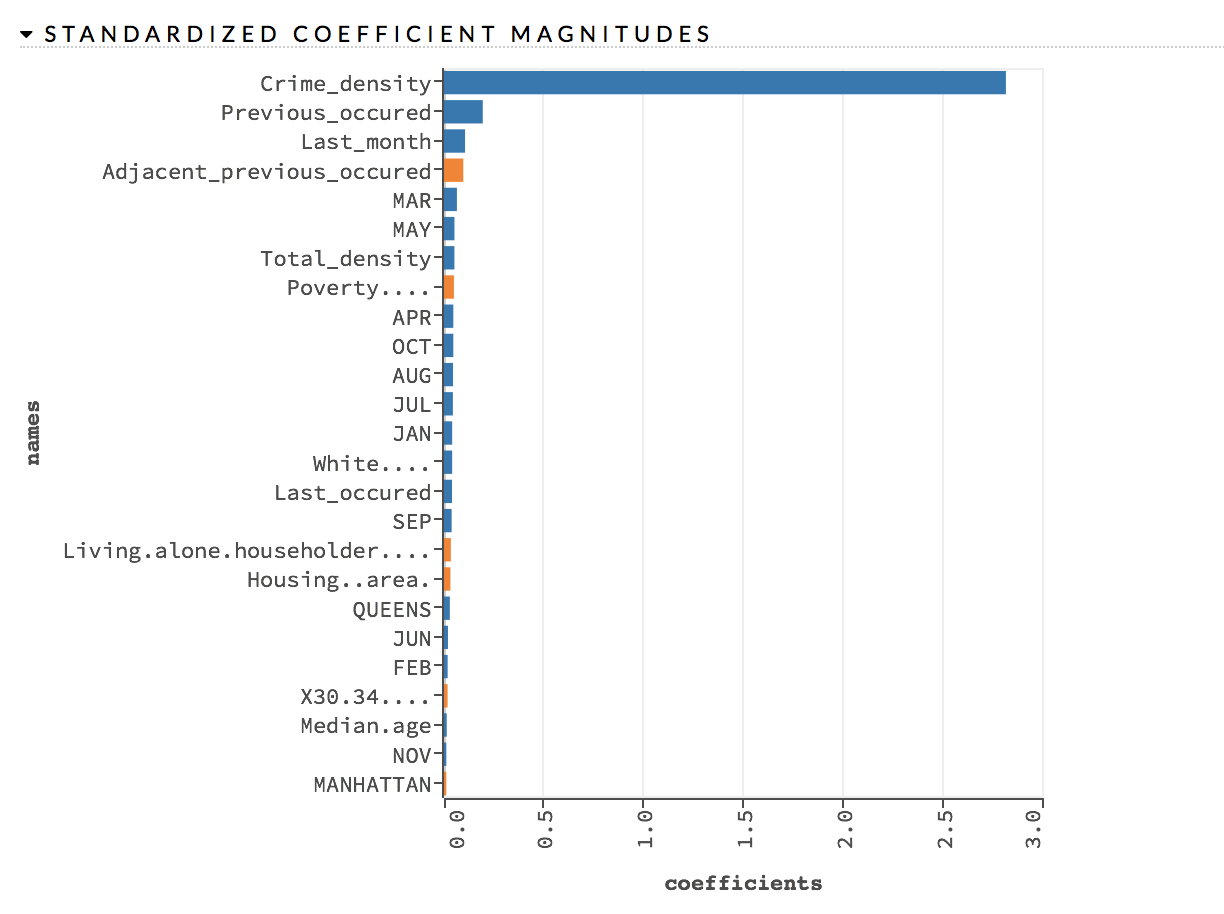

In [4]:
Image(filename="pic/violent_night_model/glm.png")

In [15]:
# measure train and test AUC
print(glm_model.auc(train=True))
print(glm_model.model_performance(test_data=test).auc())

0.8410599117306465
0.8232940723453367


In [16]:
# print non-zero model parameters
for name, val in glm_model.coef().items():
    if val != 0.0:
        print(name, ': ', val)

Intercept :  -10.955223436514574
Last_month :  0.07546912800575813
Previous_occured :  0.06755036828915437
Adjacent_previous_occured :  -0.03990823070543412
Last_occured :  0.014918361942790444
Crime_density :  1.4291880842889295
Total_density :  0.041751399824690456
Education.rate.... :  -0.002208256640286579
Housing..area. :  -0.026209119150693082
Foreign.born.... :  -0.005042729407816058
Poverty.... :  -0.021537354150673402
X15.19.... :  -0.005915985774737635
X20.24.... :  -0.0018650229590038401
X25.29.... :  -0.010558444291900147
X30.34.... :  -0.016295764999356147
Median.age :  0.016185911256372063
White.... :  0.014783893733801574
Asian.... :  0.003703994350930227
Hispanic.or.Latino.... :  -0.0039120492149929634
Living.alone.householder.... :  -0.02222521477301072
Renter.occupied.... :  -0.004286564655375894
MANHATTAN :  -0.034688791677024544
QUEENS :  0.06447812861349025
JAN :  0.15114087161150505
FEB :  0.06811612176194211
MAR :  0.23637867646547492
APR :  0.1714777650253431
MA

In [3]:
%matplotlib inline

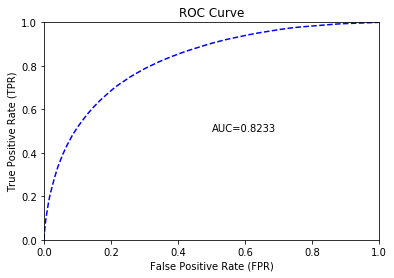

In [18]:
perf = glm_model.model_performance(test_data=test)
perf.plot()

In [19]:
prediction = glm_model.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [20]:
prediction['Round_lon'] = test['Round_lon']
prediction['Round_lat'] = test['Round_lat']
prediction['Year'] = test['Year']
prediction['Month'] = test['Month']
prediction['Actual'] = test[response]

In [21]:
threshold = 0.7041
prediction['predict'] = (prediction['p1'] >= threshold)

In [22]:
prediction = prediction.as_data_frame()

In [23]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,312490,38828
1,20717,24325


* Prediction Accuracy: 84.98%
* Sensitivity: 54.01%
* Specificity: 88.95%
* False Negative Rate: 45.99%
* False Positive Rate: 11.05%
* Precision: 38.52%
* Negative Predictive Value: 93.78%

In [24]:
prediction.to_csv('Violent_night_glm_cross.csv')

## Random forest model

In [25]:
import gc

In [26]:
gc.collect()

2244

In [27]:
# random forest
rf_model = H2ORandomForestEstimator(
    ntrees=300,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model',           # for easy lookup in flow
    nfolds = nfolds,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True,
    seed=1234
    )             

# train rf model
rf_model.train(
    x=predictor,
    y=response,
    training_frame=train)

# print model information
rf_model

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.17339863669559227
RMSE: 0.4164116193090585
LogLoss: 0.538719588021181
Mean Per-Class Error: 0.2568543996832624
AUC: 0.821850955785285
Gini: 0.64370191157057
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3888984033085897: 


,0,1,Error,Rate
0,154764.0,87708.0,0.3617,(87708.0/242472.0)
1,41545.0,200927.0,0.1713,(41545.0/242472.0)
Total,196309.0,288635.0,0.2665,(129253.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3888984,0.7566347,241.0
max f2,0.1321377,0.8541940,348.0
max f0point5,0.6143076,0.7545846,152.0
max accuracy,0.5024042,0.7431456,197.0
max precision,0.9966815,0.9721279,2.0
max recall,0.0000344,1.0,399.0
max specificity,0.9998902,0.9986803,0.0
max absolute_mcc,0.5024042,0.4863347,197.0
max min_per_class_accuracy,0.4943845,0.7418217,200.0
max mean_per_class_accuracy,0.5024042,0.7431456,197.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0117498,1.0,1.9364689,1.9364689,0.9682345,0.9682345,0.0227531,0.0227531,93.6468936,93.6468936
,2,0.0200002,0.9970704,1.9310172,1.9342200,0.9655086,0.9671100,0.0159317,0.0386849,93.1017246,93.4220023
,3,0.0300014,0.9921015,1.8960825,1.9215066,0.9480412,0.9607533,0.0189630,0.0576479,89.6082474,92.1506633
,4,0.0400005,0.9842042,1.8511033,1.9039076,0.9255517,0.9519538,0.0185094,0.0761572,85.1103320,90.3907619
,5,0.0500016,0.9727129,1.8346392,1.8900528,0.9173196,0.9450264,0.0183485,0.0945058,83.4639175,89.0052788
,6,0.1000012,0.9305556,1.8069864,1.8485205,0.9034932,0.9242602,0.0903486,0.1848543,80.6986431,84.8520466
,7,0.1500008,0.8840954,1.7301934,1.8090787,0.8650967,0.9045393,0.0865090,0.2713633,73.0193426,80.9078662
,8,0.2000004,0.8341549,1.6404504,1.7669220,0.8202252,0.8834610,0.0820218,0.3533851,64.0450365,76.6922022
,9,0.2999996,0.7257005,1.5022477,1.6786979,0.7511239,0.8393489,0.1502235,0.5036087,50.2247701,67.8697855
,10,0.4000008,0.6095155,1.2961749,1.5830661,0.6480874,0.7915331,0.1296191,0.6332278,29.6174863,58.3066121




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1697259705496688
RMSE: 0.41197811901807213
LogLoss: 0.5124403270812457
Mean Per-Class Error: 0.25195692698538386
AUC: 0.8281753691099675
Gini: 0.656350738219935
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3538010788069607: 


,0,1,Error,Rate
0,144964.0,97508.0,0.4021,(97508.0/242472.0)
1,33761.0,208711.0,0.1392,(33761.0/242472.0)
Total,178725.0,306219.0,0.2707,(131269.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3538011,0.7607597,255.0
max f2,0.1272573,0.8563185,348.0
max f0point5,0.6079758,0.7593347,156.0
max accuracy,0.4927006,0.7480431,202.0
max precision,0.9978930,0.9771715,1.0
max recall,0.0014143,1.0,398.0
max specificity,0.9994638,0.9994927,0.0
max absolute_mcc,0.4927006,0.4961106,202.0
max min_per_class_accuracy,0.4992730,0.7473853,199.0
max mean_per_class_accuracy,0.4927006,0.7480431,202.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100032,0.9977580,1.9521748,1.9521748,0.9760874,0.9760874,0.0195280,0.0195280,95.2174809,95.2174809
,2,0.0200002,0.9898479,1.9150165,1.9336014,0.9575083,0.9668007,0.0191445,0.0386725,91.5016502,93.3601402
,3,0.0300014,0.9828112,1.9183505,1.9285174,0.9591753,0.9642587,0.0191857,0.0578582,91.8350515,92.8517424
,4,0.0400005,0.9745693,1.8861621,1.9179297,0.9430810,0.9589648,0.0188599,0.0767181,88.6162095,91.7929683
,5,0.0500016,0.9667545,1.8725773,1.9088585,0.9362887,0.9544292,0.0187279,0.0954461,87.2577320,90.8858463
,6,0.1000012,0.9248894,1.8143275,1.8615940,0.9071638,0.9307970,0.0907156,0.1861617,81.4327546,86.1593979
,7,0.1500008,0.8802324,1.7409164,1.8213687,0.8704582,0.9106843,0.0870451,0.2732068,74.0916402,82.1368673
,8,0.2000004,0.8321307,1.6548027,1.7797276,0.8274013,0.8898638,0.0827395,0.3559463,65.4802656,77.9727598
,9,0.2999996,0.7259064,1.5076504,1.6890358,0.7538252,0.8445179,0.1507638,0.5067101,50.7650431,68.9035832
,10,0.4000008,0.6116467,1.3106506,1.5944385,0.6553253,0.7972193,0.1310667,0.6377767,31.0650583,59.4438545



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.7324083,0.0014662,0.7329176,0.7347075,0.7329671,0.7290409
auc,0.8281851,0.0005210,0.8273185,0.8284304,0.8292596,0.8277320
err,0.2675917,0.0014662,0.2670824,0.2652925,0.2670329,0.2709591
err_count,32441.75,177.7543,32380.0,32163.0,32374.0,32850.0
f0point5,0.7150829,0.0019670,0.7159501,0.7182981,0.7154426,0.7106407
f1,0.7611800,0.0002697,0.7608073,0.7609819,0.7618123,0.7611187
f2,0.8136613,0.0026939,0.8116611,0.8090589,0.8146092,0.8193162
lift_top_group,1.9542457,0.0032326,1.9521847,1.9620775,1.9505359,1.9521847
logloss,0.5124403,0.0013204,0.5142465,0.511603,0.5097747,0.5141372
max_per_class_error,0.3880695,0.0077405,0.3836814,0.3752186,0.3881355,0.4052427


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-14 23:56:10,25 min 11.531 sec,0.0,nan,nan,nan,nan,nan
,2018-04-14 23:56:12,25 min 14.183 sec,1.0,0.5391807,8.7255249,0.6952138,1.3972761,0.3213797
,2018-04-14 23:56:15,25 min 16.687 sec,2.0,0.5256289,7.6027823,0.7049276,1.4254713,0.3244221
,2018-04-14 23:56:17,25 min 19.169 sec,3.0,0.5137411,6.6313537,0.7157373,1.4493706,0.3237988
,2018-04-14 23:56:20,25 min 21.692 sec,4.0,0.5034958,5.8191387,0.7248451,1.4740388,0.3235126
---,---,---,---,---,---,---,---,---
,2018-04-14 23:59:40,28 min 41.849 sec,80.0,0.4166824,0.5418911,0.8214838,1.9309778,0.2715138
,2018-04-14 23:59:43,28 min 44.381 sec,81.0,0.4166153,0.5412933,0.8215479,1.9311382,0.2696456
,2018-04-14 23:59:45,28 min 46.958 sec,82.0,0.4165520,0.5402827,0.8216277,1.9337748,0.2720293
,2018-04-14 23:59:48,28 min 49.419 sec,83.0,0.4164729,0.5395960,0.8217632,1.9344036,0.2682928



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Crime_density,1391208.7500000,1.0,0.2270851
Total_density,1033523.0625000,0.7428957,0.1687006
Adjacent_previous_occured,843236.8750000,0.6061182,0.1376404
Previous_occured,579745.6875000,0.4167208,0.0946311
Last_occured,531074.3125000,0.3817359,0.0866865
---,---,---,---
X30.34....,27287.7714844,0.0196144,0.0044541
QUEENS,13617.9912109,0.0097886,0.0022228
BROOKLYN,5774.9423828,0.0041510,0.0009426
MANHATTAN,4177.125,0.0030025,0.0006818



See the whole table with table.as_data_frame()


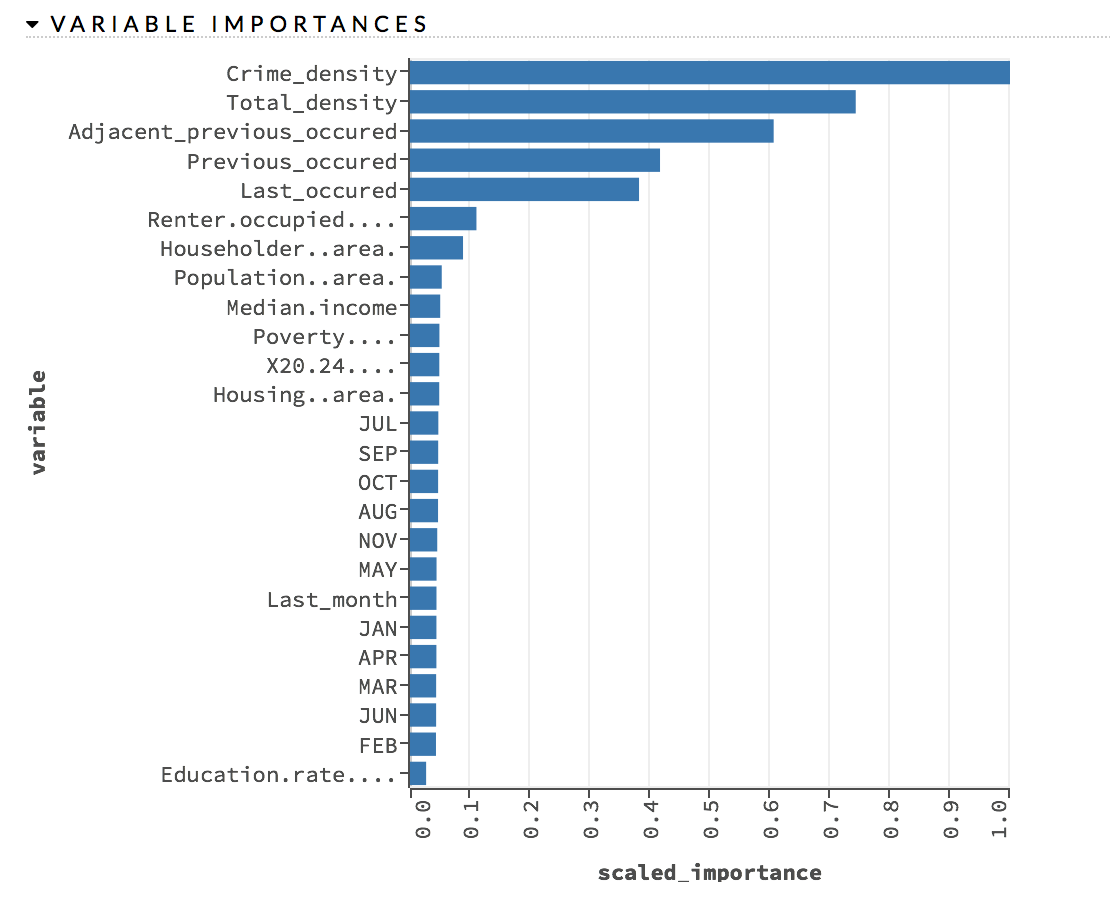

In [5]:
Image(filename="pic/violent_night_model/rf.png")

In [28]:
rf_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,Crime_density,1.391209e+06,1.000000,0.227085
1,Total_density,1.033523e+06,0.742896,0.168701
2,Adjacent_previous_occured,8.432369e+05,0.606118,0.137640
3,Previous_occured,5.797457e+05,0.416721,0.094631
4,Last_occured,5.310743e+05,0.381736,0.086687
5,Renter.occupied....,1.540610e+05,0.110739,0.025147
6,Householder..area.,1.229551e+05,0.088380,0.020070
7,Population..area.,7.361126e+04,0.052912,0.012015
8,Median.income,7.005461e+04,0.050355,0.011435
9,Poverty....,6.821007e+04,0.049029,0.011134


In [29]:
print(rf_model.auc(train=True))
print(rf_model.model_performance(test_data=test).auc())

0.821850955785285
0.8078854433985693


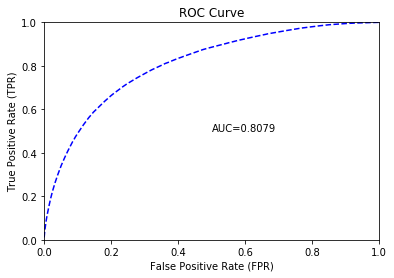

In [30]:
perf = rf_model.model_performance(test_data=test)
perf.plot()

In [31]:
prediction = rf_model.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [32]:
prediction['Round_lon'] = test['Round_lon']
prediction['Round_lat'] = test['Round_lat']
prediction['Year'] = test['Year']
prediction['Month'] = test['Month']
prediction['Actual'] = test[response]

In [33]:
prediction.head

predict,p0,p1,Round_lon,Round_lat,Year,Month,Actual
0,0.627556,0.372444,1,3,2015,JAN,0
1,0.570306,0.429694,1,3,2015,FEB,0
0,0.644421,0.355579,1,3,2015,MAR,0
0,0.662004,0.337996,1,3,2015,APR,0
0,0.621077,0.378923,1,3,2015,MAY,0
0,0.61258,0.38742,1,3,2015,JUN,0
0,0.620129,0.379871,1,3,2015,JUL,0
0,0.661989,0.338011,1,3,2015,AUG,0
0,0.718989,0.281011,1,3,2015,SEP,0
0,0.613743,0.386257,1,3,2015,OCT,0


<bound method H2OFrame.head of >

In [34]:
threshold = 0.7192
prediction['predict'] = (prediction['p1'] >= threshold)

In [35]:
prediction = prediction.as_data_frame()

In [36]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,315702,35616
1,22857,22185


* Prediction Accuracy: 85.25%
* Sensitivity: 49.25%
* Specificity: 89.86%
* False Negative Rate: 50.75%
* False Positive Rate: 10.14%
* Precision: 38.38%
* Negative Predictive Value: 93.25%

In [37]:
prediction.to_csv('Violent_night_rf_cross.csv')

## Neural network model

In [41]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator(seed=1234,
                                                 model_id='nn_model',
                                                 nfolds=nfolds,
                                                 fold_assignment="Modulo",
                                                 keep_cross_validation_predictions=True),
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=predictor,
              y=response,
              training_frame=train)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [42]:
gsearch

             hidden input_dropout_ratio    l1     l2  \
0    [320, 160, 80]                0.06  0.08  0.003   

                                                               model_ids  \
0  Grid_DeepLearning_py_2_sid_9a31_model_python_1523762668854_812_mod...   

             logloss  
0  1.284551759336172  


In [43]:
nn_model = gsearch.get_grid()[0]

# print model information
nn_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  Grid_DeepLearning_py_2_sid_9a31_model_python_1523762668854_812_model_0


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.4227625227337804
RMSE: 0.6502019092049641
LogLoss: 1.2827309263118924
Mean Per-Class Error: 0.5
AUC: 0.5
Gini: 0.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08359177346679496: 


,0,1,Error,Rate
0,0.0,4939.0,1.0,(4939.0/4939.0)
1,0.0,4924.0,0.0,(0.0/4924.0)
Total,0.0,9863.0,0.5008,(4939.0/9863.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0835918,0.6659904,0.0
max f2,0.0835918,0.8329105,0.0
max f0point5,0.0835918,0.5548044,0.0
max accuracy,0.0835918,0.4992396,0.0
max precision,0.0835918,0.4992396,0.0
max recall,0.0835918,1.0,0.0
max specificity,0.0835918,0.0,0.0
max absolute_mcc,0.0835918,0.0,0.0
max min_per_class_accuracy,0.0835918,0.0,0.0
max mean_per_class_accuracy,0.0835918,0.5,0.0


Gains/Lift Table: Avg response rate: 49.92 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,1.0,0.0835918,1.0,1.0,0.4992396,0.4992396,1.0,1.0,0.0,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.4233958111245607
RMSE: 0.6506887206065284
LogLoss: 1.284551759336172
Mean Per-Class Error: 0.5
AUC: 0.5
Gini: 0.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0835917734667945: 


,0,1,Error,Rate
0,0.0,242472.0,1.0,(242472.0/242472.0)
1,0.0,242472.0,0.0,(0.0/242472.0)
Total,0.0,484944.0,0.5,(242472.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0835918,0.6666667,0.0
max f2,0.0835918,0.8333333,0.0
max f0point5,0.0835918,0.5555556,0.0
max accuracy,0.0835918,0.5,0.0
max precision,0.0835918,0.5,0.0
max recall,0.0835918,1.0,0.0
max specificity,0.0835918,0.0,0.0
max absolute_mcc,0.0835918,0.0,0.0
max min_per_class_accuracy,0.0835918,0.0,0.0
max mean_per_class_accuracy,0.0835918,0.5,0.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.25,0.0835918,1.0,1.0,0.5,0.5,0.25,0.25,0.0,0.0
,2,0.5,0.0835918,1.0,1.0,0.5,0.5,0.25,0.5,0.0,0.0
,3,0.5,0.0835918,0.0,1.0,0.0,0.5,0.0,0.5,-100.0,0.0
,4,0.75,0.0835918,1.0,1.0,0.5,0.5,0.25,0.75,0.0,0.0
,5,1.0,0.0835918,1.0,1.0,0.5,0.5,0.25,1.0,0.0,0.0



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.5,0.0,0.5,0.5,0.5,0.5
auc,0.5,0.0,0.5,0.5,0.5,0.5
err,0.5,0.0,0.5,0.5,0.5,0.5
err_count,60618.0,0.0,60618.0,60618.0,60618.0,60618.0
f0point5,0.5555556,0.0,0.5555556,0.5555556,0.5555556,0.5555556
f1,0.6666667,0.0,0.6666667,0.6666667,0.6666667,0.6666667
f2,0.8333333,0.0,0.8333333,0.8333333,0.8333333,0.8333333
lift_top_group,1.0,0.0,1.0,1.0,1.0,1.0
logloss,1.2845517,0.0000000,1.2845517,1.2845517,1.2845517,1.2845517
max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-15 00:17:00,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2018-04-15 00:17:02,8 min 40.988 sec,20060 obs/sec,0.0796731,1,38637.0,0.6502019,1.2827309,0.5,1.0,0.5007604
,2018-04-15 00:17:08,8 min 46.785 sec,31152 obs/sec,0.4798080,6,232680.0,0.6502019,1.2827309,0.5,1.0,0.5007604
,2018-04-15 00:17:13,8 min 52.626 sec,32656 obs/sec,0.8791448,11,426336.0,0.6502019,1.2827309,0.5,1.0,0.5007604
,2018-04-15 00:17:19,8 min 58.516 sec,33210 obs/sec,1.2787126,16,620104.0,0.6502019,1.2827309,0.5,1.0,0.5007604
---,---,---,---,---,---,---,---,---,---,---,---
,2018-04-15 00:19:10,10 min 49.445 sec,34447 obs/sec,8.8557916,111,4294563.0,0.6502019,1.2827309,0.5,1.0,0.5007604
,2018-04-15 00:19:16,10 min 55.117 sec,34212 obs/sec,9.1766410,115,4450157.0,0.6511752,1.2863726,0.5,1.0,0.5007604
,2018-04-15 00:19:22,11 min 0.926 sec,34237 obs/sec,9.5755716,120,4643616.0,0.6502019,1.2827309,0.5,1.0,0.5007604
,2018-04-15 00:19:28,11 min 6.698 sec,34266 obs/sec,9.9735495,125,4836613.0,0.6502019,1.2827309,0.5,1.0,0.5007604



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SEP,1.0,1.0,0.0327114
FEB,0.9089419,0.9089419,0.0297327
APR,0.9063874,0.9063874,0.0296492
Crime_density,0.8660291,0.8660291,0.0283290
AUG,0.8563200,0.8563200,0.0280114
---,---,---,---
Population..area.,0.7269659,0.7269659,0.0237801
Last_month,0.7243178,0.7243178,0.0236934
NOV,0.7156307,0.7156307,0.0234093
JUN,0.7121754,0.7121754,0.0232962



See the whole table with table.as_data_frame()


In [44]:
print(nn_model.auc(train=True))
print(nn_model.model_performance(test_data=test).auc())

0.5
0.5


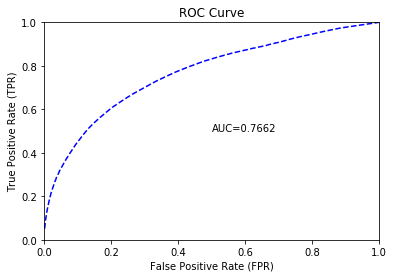

In [68]:
perf = nn_model.model_performance(test_data=test)
perf.plot()

In [69]:
prediction = nn_model.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [70]:
prediction['Actual'] = test[response]

In [71]:
threshold = 0.9318
prediction['predict'] = (prediction['p1'] >= threshold)

In [72]:
prediction = prediction.as_data_frame()

In [73]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,304291,36913
1,29438,25718


In [74]:
prediction.to_csv('Violent_day_nn.csv')

## Stacked ensemble (glm and rf model)

In [45]:
gc.collect()

2192

In [46]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [47]:
ensemble = H2OStackedEnsembleEstimator(model_id="ensemble_model",
                                       base_models=[glm_model, rf_model],
                                       seed=1234)
ensemble.train(x=predictor, 
               y=response, 
               training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [48]:
print(ensemble.model_performance(train=True).auc())
print(ensemble.model_performance(test_data=test).auc())

0.9071755699098945
0.824047666964148


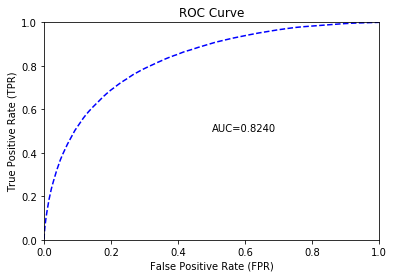

In [49]:
perf = ensemble.model_performance(test_data=test)
perf.plot()

In [50]:
prediction = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [51]:
prediction['Actual'] = test[response]

In [52]:
threshold = 0.6510
prediction['predict'] = (prediction['p1'] >= threshold)

In [53]:
prediction = prediction.as_data_frame()

In [54]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,295813,55505
1,16702,28340


* Prediction Accuracy: 81.78%
* Sensitivity: 62.92%
* Specificity: 84.20%
* False Negative Rate: 37.08%
* False Positive Rate: 15.80%
* Precision: 33.80%
* Negative Predictive Value: 94.66%

In [55]:
prediction.to_csv('Violent_night_ensemble.csv')

## GBM stacked ensemble

In [56]:
gc.collect()

2272

In [57]:
# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600,
                   'seed':1234}

In [58]:
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=1234,
                                                    nfolds=nfolds,
                                                    fold_assignment="Modulo",
                                                    keep_cross_validation_predictions=True),
                     hyper_params=hyper_parameters,
                     search_criteria=search_criteria,
                     grid_id="gbm")
grid.train(x=predictor, 
           y=response, 
           training_frame=train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [59]:
gbm_model = grid.get_grid()[0]
gbm_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model_0


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1606357817250373
RMSE: 0.4007939392319167
LogLoss: 0.483481570528617
Mean Per-Class Error: 0.23858631099673366
AUC: 0.8449866386495201
Gini: 0.6899732772990401
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39127762994205656: 


,0,1,Error,Rate
0,157215.0,85257.0,0.3516,(85257.0/242472.0)
1,36065.0,206407.0,0.1487,(36065.0/242472.0)
Total,193280.0,291664.0,0.2502,(121322.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3912776,0.7728631,243.0
max f2,0.1718100,0.8619192,338.0
max f0point5,0.5994698,0.7756597,159.0
max accuracy,0.4936706,0.7614137,202.0
max precision,0.9883948,1.0,0.0
max recall,0.0286825,1.0,393.0
max specificity,0.9883948,1.0,0.0
max absolute_mcc,0.5238877,0.5229292,189.0
max min_per_class_accuracy,0.4989231,0.7606322,200.0
max mean_per_class_accuracy,0.4936706,0.7614137,202.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100012,0.9764206,1.9855670,1.9855670,0.9927835,0.9927835,0.0198580,0.0198580,98.5567010,98.5567010
,2,0.0200002,0.9667696,1.9583419,1.9719559,0.9791710,0.9859779,0.0195816,0.0394396,95.8341926,97.1955872
,3,0.0300014,0.9587752,1.9373196,1.9604097,0.9686598,0.9802048,0.0193754,0.0588150,93.7319588,96.0409650
,4,0.0400005,0.9509388,1.9158589,1.9492731,0.9579295,0.9746366,0.0191569,0.0779719,91.5858940,94.9273121
,5,0.0500016,0.9435092,1.9088660,1.9411910,0.9544330,0.9705955,0.0190909,0.0970628,90.8865979,94.1191026
,6,0.1000012,0.9054730,1.8533427,1.8972678,0.9266713,0.9486339,0.0926664,0.1897291,85.3342682,89.7267760
,7,0.1500008,0.8651157,1.7767971,1.8571114,0.8883986,0.9285557,0.0888391,0.2785682,77.6797130,85.7111435
,8,0.2000004,0.8225272,1.6956324,1.8167421,0.8478162,0.9083711,0.0847809,0.3633492,69.5632449,81.6742105
,9,0.2999996,0.7190534,1.5462944,1.7265935,0.7731472,0.8632967,0.1546282,0.5179773,54.6294387,72.6593485
,10,0.4000008,0.6056764,1.3342406,1.6285043,0.6671203,0.8142521,0.1334257,0.6514030,33.4240643,62.8504263




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1620076599119484
RMSE: 0.40250175143960354
LogLoss: 0.4871556164421376
Mean Per-Class Error: 0.24096184301692558
AUC: 0.8423258266313904
Gini: 0.6846516532627809
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3766011378235496: 


,0,1,Error,Rate
0,152777.0,89695.0,0.3699,(89695.0/242472.0)
1,34331.0,208141.0,0.1416,(34331.0/242472.0)
Total,187108.0,297836.0,0.2558,(124026.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3766011,0.7704531,251.0
max f2,0.1608341,0.8607307,342.0
max f0point5,0.6344203,0.7733213,149.0
max accuracy,0.4990175,0.7590382,202.0
max precision,0.9871726,1.0,0.0
max recall,0.0235026,1.0,393.0
max specificity,0.9871726,1.0,0.0
max absolute_mcc,0.4990175,0.5180812,202.0
max min_per_class_accuracy,0.4966493,0.7583680,203.0
max mean_per_class_accuracy,0.4990175,0.7590382,202.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100012,0.9759857,1.9785567,1.9785567,0.9892784,0.9892784,0.0197879,0.0197879,97.8556701,97.8556701
,2,0.0200002,0.9665568,1.9447309,1.9616455,0.9723654,0.9808228,0.0194455,0.0392334,94.4730872,96.1645530
,3,0.0300014,0.9586826,1.9315464,1.9516118,0.9657732,0.9758059,0.0193177,0.0585511,93.1546392,95.1611795
,4,0.0400005,0.9515189,1.9142091,1.9422621,0.9571046,0.9711310,0.0191404,0.0776914,91.4209115,94.2262089
,5,0.0500016,0.9444495,1.9018557,1.9341801,0.9509278,0.9670901,0.0190208,0.0967122,90.1855670,93.4180139
,6,0.1000012,0.9067110,1.8522704,1.8932261,0.9261352,0.9466131,0.0926128,0.1893250,85.2270384,89.3226106
,7,0.1500008,0.8659780,1.7687137,1.8517225,0.8843568,0.9258613,0.0884350,0.2777599,76.8713655,85.1722526
,8,0.2000004,0.8223169,1.6898585,1.8112569,0.8449293,0.9056285,0.0844922,0.3622521,68.9858539,81.1256947
,9,0.2999996,0.7224614,1.5388295,1.7204484,0.7694148,0.8602242,0.1538817,0.5161338,53.8829546,72.0448437
,10,0.4000008,0.6066363,1.3298278,1.6227923,0.6649139,0.8113961,0.1329844,0.6491182,32.9827817,62.2792275



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.745748,0.0015462,0.7429807,0.7491009,0.7452902,0.7456201
auc,0.8423396,0.0006576,0.8410017,0.8425076,0.8436163,0.8422328
err,0.2542521,0.0015462,0.2570194,0.2508991,0.2547098,0.2543799
err_count,30824.5,187.45766,31160.0,30418.0,30880.0,30840.0
f0point5,0.7277957,0.0020059,0.7246415,0.7323862,0.7268168,0.7273384
f1,0.7708105,0.0005385,0.7694960,0.7713448,0.7712321,0.7711691
f2,0.8192502,0.0018889,0.8202696,0.8146809,0.8214292,0.8206212
lift_top_group,1.9798021,0.0052384,1.9835119,1.9851607,1.9835119,1.9670238
logloss,0.4871556,0.0008610,0.4889000,0.4868838,0.4854895,0.4873492
max_per_class_error,0.3635925,0.0064751,0.3720512,0.3481804,0.3681085,0.3660299


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-15 00:30:01,3 min 13.224 sec,0.0,0.5,0.6931472,0.5,1.0,0.5
,2018-04-15 00:30:01,3 min 13.586 sec,1.0,0.4833384,0.6603168,0.8374416,1.9637283,0.2531055
,2018-04-15 00:30:01,3 min 13.824 sec,2.0,0.4694392,0.6334923,0.8397346,1.9673057,0.2549325
,2018-04-15 00:30:02,3 min 14.121 sec,3.0,0.4578909,0.6113758,0.8404226,1.9689083,0.2543881
,2018-04-15 00:30:02,3 min 14.424 sec,4.0,0.4481921,0.5927607,0.8409112,1.9686138,0.2558502
---,---,---,---,---,---,---,---,---
,2018-04-15 00:30:21,3 min 33.294 sec,105.0,0.4007939,0.4834816,0.8449866,1.9855670,0.2501773
,2018-04-15 00:30:25,3 min 37.304 sec,170.0,0.4007939,0.4834816,0.8449866,1.9855670,0.2501773
,2018-04-15 00:30:29,3 min 41.329 sec,234.0,0.4007939,0.4834816,0.8449866,1.9855670,0.2501773
,2018-04-15 00:30:33,3 min 45.363 sec,298.0,0.4007939,0.4834816,0.8449866,1.9855670,0.2501773



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Crime_density,105814.7734375,1.0,0.6233124
Previous_occured,25078.6230469,0.2370049,0.1477281
Adjacent_previous_occured,19846.1406250,0.1875555,0.1169056
Total_density,15026.8583984,0.1420110,0.0885172
Last_occured,767.4943848,0.0072532,0.0045210
---,---,---,---
FEB,16.6862354,0.0001577,0.0000983
JUN,16.0636654,0.0001518,0.0000946
BROOKLYN,15.8731480,0.0001500,0.0000935
MANHATTAN,11.6996593,0.0001106,0.0000689



See the whole table with table.as_data_frame()


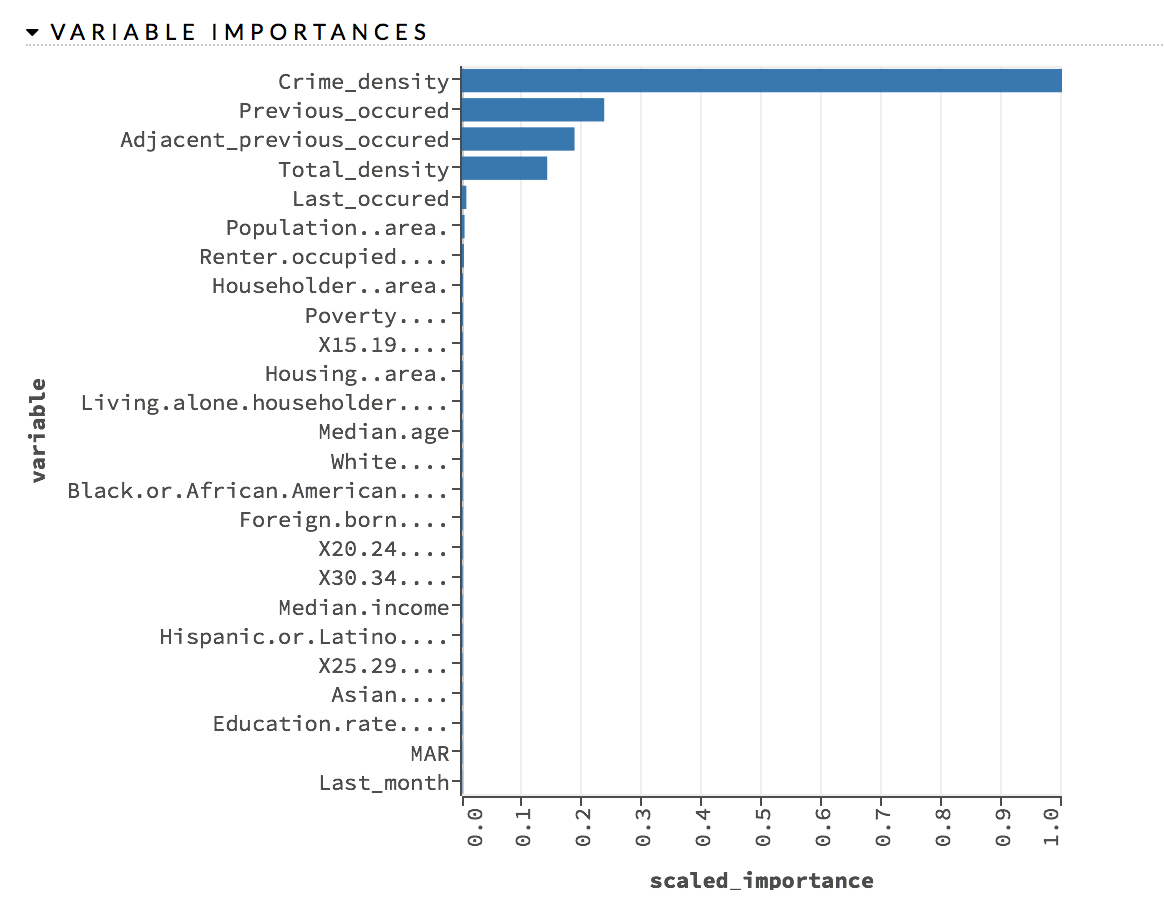

In [6]:
Image(filename="pic/violent_night_model/gbm.png")

In [60]:
print(gbm_model.auc(train=True))
print(gbm_model.model_performance(test_data=test).auc())

0.8449866386495201
0.8232793941640492


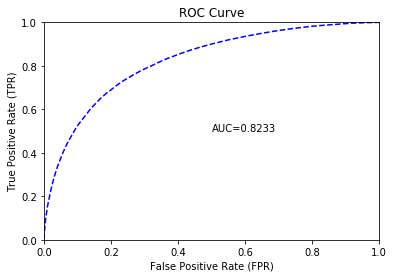

In [61]:
perf = gbm_model.model_performance(test_data=test)
perf.plot()

In [62]:
prediction = gbm_model.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [63]:
prediction['Actual'] = test[response]

In [64]:
threshold = 0.6877
prediction['predict'] = (prediction['p1'] >= threshold)

In [65]:
prediction = prediction.as_data_frame()

In [66]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,313379,37939
1,20667,24375


* Prediction Accuracy: 85.21%
* Sensitivity: 54.12%
* Specificity: 89.20%
* False Negative Rate: 45.88%
* False Positive Rate: 10.80%
* Precision: 39.12%
* Negative Predictive Value: 93.81%

In [67]:
prediction.to_csv('Violent_night_gbm_model.csv')

In [68]:
gbm_ensemble = H2OStackedEnsembleEstimator(model_id="ensemble_gbm",
                                           base_models=grid.model_ids,
                                           seed=1234)
gbm_ensemble.train(x=predictor, 
                   y=response, 
                   training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [69]:
gbm_ensemble

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  ensemble_gbm
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.151134139427006
RMSE: 0.38875974512159306
LogLoss: 0.4633650379827194
Null degrees of freedom: 484943
Residual degrees of freedom: 484941
Null deviance: 672275.1326586829
Residual deviance: 449412.1899589838
AIC: 449418.1899589838
AUC: 0.8652333703275773
Gini: 0.7304667406551546
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38847290078497454: 


,0,1,Error,Rate
0,167597.0,74875.0,0.3088,(74875.0/242472.0)
1,36412.0,206060.0,0.1502,(36412.0/242472.0)
Total,204009.0,280935.0,0.2295,(111287.0/484944.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3884729,0.7873796,252.0
max f2,0.1814994,0.8719428,347.0
max f0point5,0.6534920,0.7932323,142.0
max accuracy,0.5084034,0.7774733,202.0
max precision,0.9258782,1.0,0.0
max recall,0.0865930,1.0,394.0
max specificity,0.9258782,1.0,0.0
max absolute_mcc,0.5084034,0.5550511,202.0
max min_per_class_accuracy,0.4962753,0.7761968,207.0
max mean_per_class_accuracy,0.5084034,0.7774733,202.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100012,0.9226216,1.9995876,1.9995876,0.9997938,0.9997938,0.0199982,0.0199982,99.9587629,99.9587629
,2,0.0200002,0.9189126,1.9950505,1.9973193,0.9975253,0.9986597,0.0199487,0.0399469,99.5050526,99.7319311
,3,0.0300014,0.9157581,1.9847423,1.9931267,0.9923711,0.9965633,0.0198497,0.0597966,98.4742268,99.3126675
,4,0.0400005,0.9125585,1.9612291,1.9851531,0.9806146,0.9925766,0.0196105,0.0794071,96.1229119,98.5153109
,5,0.0500016,0.9094175,1.9554639,1.9792148,0.9777320,0.9896074,0.0195569,0.0989640,95.5463918,97.9214781
,6,0.1000012,0.8918360,1.9044005,1.9418084,0.9522003,0.9709042,0.0952192,0.1941832,90.4400544,94.1808434
,7,0.1500008,0.8697012,1.8285149,1.9040444,0.9142574,0.9520222,0.0914250,0.2856082,82.8514868,90.4044431
,8,0.2000004,0.8424231,1.7358024,1.8619843,0.8679012,0.9309922,0.0867894,0.3723976,73.5802367,86.1984349
,9,0.2999996,0.7574986,1.5797418,1.7679042,0.7898709,0.8839521,0.1579729,0.5303705,57.9741824,76.7904154
,10,0.4000008,0.6335564,1.3547788,1.6646218,0.6773894,0.8323109,0.1354796,0.6658501,35.4778843,66.4621761


In [70]:
print(gbm_ensemble.model_performance(train=True).auc())
print(gbm_ensemble.model_performance(test_data=test).auc())

0.8652333703275773
0.8232489476896977


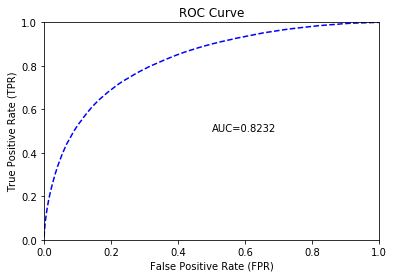

In [71]:
perf = gbm_ensemble.model_performance(test_data=test)
perf.plot()

In [72]:
prediction = gbm_ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [73]:
prediction['Actual'] = test[response]

In [74]:
threshold = 0.6984
prediction['predict'] = (prediction['p1'] >= threshold)

In [75]:
prediction = prediction.as_data_frame()

In [76]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,307766,43552
1,19146,25896


* Prediction Accuracy: 84.18%
* Sensitivity: 57.49%
* Specificity: 87.60%
* False Negative Rate: 42.51%
* False Positive Rate: 12.40%
* Precision: 37.29%
* Negative Predictive Value: 94.14%

In [78]:
prediction.to_csv('Violent_night_gbm_ensemble.csv')

## Shutdown

In [79]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_9a31 closed.
